<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_CommunityDescription_Galveston_2021_03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lumberton Testbed - Initial Interdependent Community Description

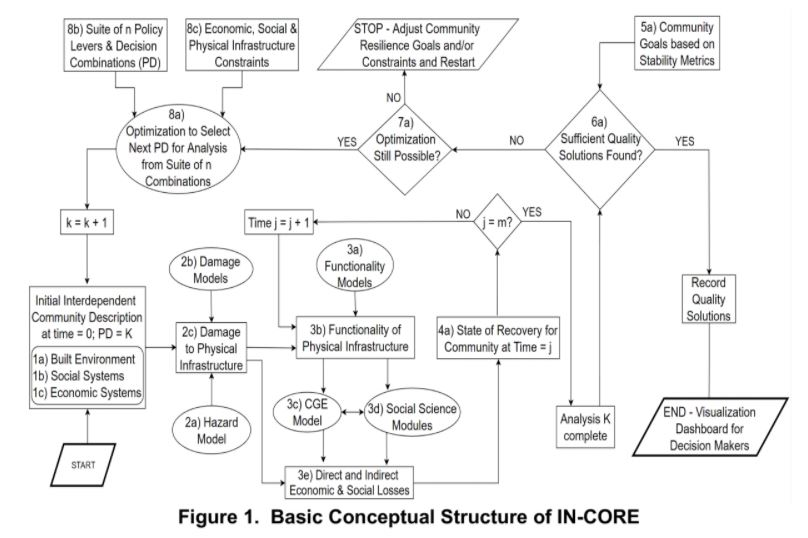

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Lumberton Testbed.

Lumberton, North Carolona is located southeast North Carolina. The region has been repeatedly impacted by hurricanes and riverine flood hazards, and has a population that is racially and ethnically diverse.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

In [2]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.3.1
numpy version:  1.21.1


In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'G:\\Shared drives\\HRRC_IN-CORE\\Tasks\\P4.9 Testebeds\\Lumberton_LaborMarketAllocation\\github_com\\npr99\\Labor_Market_Allocation\\WorkNPR\\IN-CORE_Lumberton_Testbed_2021-08-19'

In [4]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Enter username: natrose
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.6


In [5]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory

The building inventory for Lumberton consists of 20,091 individual structures. The building inventory consists of 15 archetypes.

For more details on the Building Inventory see:
> Nofal, O. M., & van de Lindt, J. W. (2020). High-Resolution Flood Risk Approach to Quantify the Impact of Policy Change on Flood Losses at Community-Level. International Journal of Disaster Risk Reduction. https://doi.org/10.1016/j.ijdrr.2021.102429

In [6]:
# Building inventory
bldg_inv_id = "6036c2a9e379f22e1658d451"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\6036c2a9e379f22e1658d451\lumberton_building_inventory_w_strcid\lumberton_building_inventory_w_strcid.shp


In [7]:
bldg_inv_gdf = gpd.read_file(filename)
bldg_inv_gdf.head()

,guid,strctid,ffe_elev,archetype,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
0,efd13166-d7a0-476b-ada5-c55cea1f0184,STefd13166-d7a0-476b-ada5-c55cea1f0184,41.41049,1,3715514603,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,40.2336,POINT (-79.08926 34.55354)
1,66352d95-70cb-46cb-8904-576f3ee3e9d3,ST66352d95-70cb-46cb-8904-576f3ee3e9d3,43.86419,2,3715516008,None,1,0,0,None,...,0,None,None,0,0,0,1985,0.0,42.9768,POINT (-79.08488 34.56072)
2,a4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,STa4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,40.84585,2,3715514607,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08826 34.55475)
3,e433891c-aa7a-47b0-a6aa-1b0895a65908,STe433891c-aa7a-47b0-a6aa-1b0895a65908,40.90913,2,3715514606,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08842 34.55446)
4,7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,ST7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,40.69086,1,3715514605,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.6240,POINT (-79.08862 34.55423)


In [8]:
bldg_inv_gdf.columns

Index(['guid', 'strctid', 'ffe_elev', 'archetype', 'parid', 'struct_typ',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_bldg',
       'appr_land', 'appr_tot', 'year_built', 'lhsm_elev', 'g_elev',
       'geometry'],
      dtype='object')

In [9]:
bldg_inv_gdf[['guid','strctid','archetype','year_built','g_elev','lhsm_elev']].head()

,guid,strctid,archetype,year_built,g_elev,lhsm_elev
0,efd13166-d7a0-476b-ada5-c55cea1f0184,STefd13166-d7a0-476b-ada5-c55cea1f0184,1,1988,40.2336,0.0
1,66352d95-70cb-46cb-8904-576f3ee3e9d3,ST66352d95-70cb-46cb-8904-576f3ee3e9d3,2,1985,42.9768,0.0
2,a4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,STa4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,2,1988,39.9288,0.0
3,e433891c-aa7a-47b0-a6aa-1b0895a65908,STe433891c-aa7a-47b0-a6aa-1b0895a65908,2,1988,39.9288,0.0
4,7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,ST7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,1,1988,39.6240,0.0


In [10]:
bldg_inv_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
bldg_inv_gdf.pivot_table(index=['archetype'], 
               values=['guid'], 
               aggfunc=['count'], 
               margins=True)

,count
,guid
archetype,
0,25
1,6070
2,10273
3,249
4,1391
5,1060
6,9
7,10


In [12]:
help(viz.plot_gdf_map)

Help on function plot_gdf_map in module pyincore_viz.geoutil:

plot_gdf_map(gdf, column, category=False, basemap=True, source={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': '(C) OpenStreetMap contributors', 'name': 'OpenStreetMap.Mapnik'})
    Plot Geopandas DataFrame.
    
    Args:
        gdf (obj): Geopandas DataFrame object.
        column (str): A column name to be plot.
        category (bool): Turn on/off category option.
        basemap (bool): Turn on/off base map (e.g. openstreetmap).
        source(obj): source of the Map to be used. examples, ctx.providers.OpenStreetMap.Mapnik (default),
            ctx.providers.Stamen.Terrain, ctx.providers.CartoDB.Positron etc.



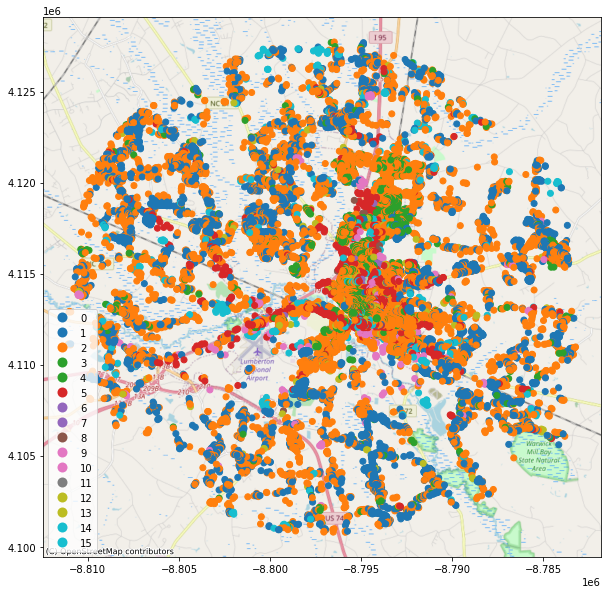

In [13]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='archetype', category = True)
map

## 1b) Social Systems: Housing Unit Inventory

The housing unit inventory includes individual household and housing unit characteristics that can be linked to residential buildings. 
For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821

>Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Alpha Release of Housing Unit Inventories.” DesignSafe-CI. https://doi.org/10.17603/ds2-jwf6-s535.

In [14]:
# Housing Unit inventory
housing_unit_inv_id = "60aac3195e52dd415f54e4ff"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\60aac3195e52dd415f54e4ff\IN-CORE_2fv1_Lumberton_Inventories_HUinventory\IN-CORE_2fv1_Lumberton_Inventories_HUinventory.csv


In [15]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,huid,blockid,tractid,bgid,FIPScounty,serialno,livetype,numprec,gqpop,ownershp,race,hispan,hispan_flag,vacancy,gqtype
0,H371559601011002001,371559601011002,37155960101,371559601011,37155,1,H,2,0,1.0,2.0,0.0,2.0,0,0
1,H371559601011003001,371559601011003,37155960101,371559601011,37155,1,H,1,0,1.0,1.0,0.0,1.0,0,0
2,H371559601011003002,371559601011003,37155960101,371559601011,37155,2,H,2,0,2.0,1.0,0.0,1.0,0,0
3,H371559601011003003,371559601011003,37155960101,371559601011,37155,3,H,3,0,2.0,2.0,0.0,2.0,0,0
4,H371559601011005001,371559601011005,37155960101,371559601011,37155,1,H,1,0,1.0,1.0,0.0,1.0,0,0


In [16]:
housing_unit_inv_df.columns

Index(['huid', 'blockid', 'tractid', 'bgid', 'FIPScounty', 'serialno',
       'livetype', 'numprec', 'gqpop', 'ownershp', 'race', 'hispan',
       'hispan_flag', 'vacancy', 'gqtype'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Pyincore Addon Modules 
The following section incudes modules that could be added to pyincore - these modules help to label the data and explore the results.

In [17]:
## Functions to add to pyincore-viz

def add_race_ethnicity_to_hua_df(df):

    df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
    df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

    df.loc[(df['race'] == 1) & (df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
    df.loc[(df['race'] == 2) & (df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
    df.loc[(df['race'] == 3) & (df['hispan'] == 0),'Race Ethnicity'] = "3 American Indian and Alaska Native alone, Not Hispanic"
    df.loc[(df['race'] == 4) & (df['hispan'] == 0),'Race Ethnicity'] = "4 Asian alone, Not Hispanic"
    df.loc[(df['race'].isin([5,6,7])) & (df['hispan'] == 0),'Race Ethnicity'] = "5 Other Race, Not Hispanic"
    df.loc[(df['hispan'] == 1),'Race Ethnicity'] = "6 Any Race, Hispanic"
    df.loc[(df['gqtype'] >= 1),'Race Ethnicity'] = "7 Group Quarters no Race Ethnicity Data"
    # Set Race Ethnicity to missing if structure is vacant - makes tables look nicer
    df.loc[(df['Race Ethnicity'] == "0 Vacant HU No Race Ethnicity Data"),'Race Ethnicity'] = np.nan

    return df

def add_tenure_to_hua_df(df):

    df['Tenure Status'] = "0 No Tenure Status"
    df['Tenure Status'].notes = "Identify Renter and Owner Occupied Housing Unit Characteristics."

    df.loc[(df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
    df.loc[(df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
    # Set Tenure Status to missing if structure is vacant - makes tables look nicer
    df.loc[(df['Tenure Status'] == "0 No Tenure Status"),'Tenure Status'] = np.nan

    return df

def add_dislocates_pd_df(df):
    """
    Population dislocation requires data on building damage and population charactersitics
    If the observation does not have building data then population dislocation 
    is set to missing.
    
    """
    df['Population Dislocation'] = "No Data"
    df['Population Dislocation'].notes = "Identify Population Dislocation."

    df.loc[(df['dislocated'] == False) & (df['guid'].notnull()),'Population Dislocation'] = "0 Does not dislocate"
    df.loc[(df['dislocated'] == True) & (df['guid'].notnull()),'Population Dislocation'] = "1 Dislocates"
    # Set Tenure Status to missing if structure is vacant - makes tables look nicer
    df.loc[(df['Population Dislocation'] == "No Data"),'Population Dislocation'] = np.nan

    return df

def add_colpercent(df, sourcevar, formatedvar):
    df['%'] = (df[sourcevar] / (df[sourcevar].sum()/2)* 100)
    df['(%)'] = df.agg('({0[%]:.1f}%)'.format,axis=1)
    df['value'] = df[sourcevar]
    df['format value'] =  df.agg('{0[value]:,.0f}'.format, axis=1)
    df[formatedvar]= df['format value'] + '\t '+ df['(%)']

    df = df.drop(columns=[sourcevar,'%','(%)','value','format value'])

    return df

# Draft function to add link to Census Data - preferable at the bottom of the table
def add_linktoCensusData(placeid = '1600000US3739700'):
    """
    I would like to have a source link under the table (left justified)
    It might be possible to edit the html code
    It might be possible to use display to "stack" 2 tables
    display(table1)
    display(source caption)
    """
    styles = [dict(selector="caption", 
    props=[("text-align", "left"),
           ("caption-side", "bottom"),
           ("font-size", "80%"),
           ("color", 'black')])]    # the color value can not be None

    url = 'https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g='+placeid+'&tid=DECENNIALSF12010.P5'
    caption = "Validate results: <a href="+url+" target='_blank'> US Census Bureau Data Viewer </a>"

    output = df.style.set_table_attributes()\
     .set_caption(caption)\
     .set_table_styles(styles)

    
    return output

def pop_results_table(df, 
                      who = "Total Houseohlds", 
                      what= "by Race, Ethncity, and Tenure Status",
                      when = "2010", 
                      where = "",
                      row_index = 'Race Ethnicity',
                      col_index = 'Tenure Status',
                      row_percent = ''):
    
    df = add_race_ethnicity_to_hua_df(df)
    df = add_tenure_to_hua_df(df)
    
    if who == "Total Houseohlds":
        variable = 'numprec'
        function = 'count'
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
    elif who == "Total Population":
        variable = 'numprec'
        function = np.sum
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
    elif who == "Median Household Income":
        variable = 'randincome'
        function = np.median
        renamecol = {'Total': who}
        num_format = "${:,.0f}"
    else:
        variable = 'numprec'
        function = 'count'
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
        
    # Generate table
    table = pd.pivot_table(df, values=variable, index=[row_index],
                           margins = True, margins_name = 'Total',
                           columns=[col_index], aggfunc=function).rename(columns=renamecol)
    table_title = "Table. "+ who +" "+ what+", "+ where +", "+ when +"."
    varformat = {(who): num_format}
    for col in table.columns:
        varformat[col] = num_format
        
    # Add percent row column
    if row_percent != '':
        numerator = table[row_percent]
        denomenator = table[who]
        table['row_pct'] = numerator/denomenator * 100
        table['Percent Row ' + '\n' + row_percent] = table.agg('{0[row_pct]:.1f}%'.format,axis=1)
        table = table.drop(columns=['row_pct'])
    
    # Add Column Percents 
    if who in ["Total Houseohlds","Total Population"]:
        # add column percent to all columns except the percent row column
        row_pct_vars = [col for col in table if col.startswith('Percent Row ')]
        columns = [col for col in table if col not in row_pct_vars]
        for col in columns:
            formated_column_name = col + ' (%)'
            table = add_colpercent(table, col, formated_column_name)
            
    # Move row percent to last column
    if row_percent != '':
        row_pct_vars = [col for col in table if col.startswith('Percent Row ')]
        columns = [col for col in table if col not in row_pct_vars]
        table = table[columns + row_pct_vars]
        
    # To do - add source information (inlcude Census Link with Place ID)
    # To do - add provenance option - name of dataset ource and program name
        
    # Caption Title Style
    styles = [dict(selector="caption", 
        props=[("text-align", "center"),
               ("caption-side", "top"),
               ("font-size", "150%"),
               ("color", 'black')])]    # the color value can not be None
    
    table = table.style\
     .set_caption(table_title)\
     .set_table_styles(styles)\
     .format(varformat)

    return table

In [18]:
pop_results_table(housing_unit_inv_df, where = "Robeson County NC")

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Houseohlds (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","11,154 (36.1%)","4,222 (26.4%)","15,376 (32.8%)"
"2 Black alone, Not Hispanic","5,891 (19.1%)","5,227 (32.7%)","11,118 (23.7%)"
"3 American Indian and Alaska Native alone, Not Hispanic","12,561 (40.7%)","4,719 (29.5%)","17,280 (36.9%)"
"4 Asian alone, Not Hispanic",114 (0.4%),144 (0.9%),258 (0.6%)
"5 Other Race, Not Hispanic",292 (0.9%),268 (1.7%),560 (1.2%)
"6 Any Race, Hispanic",859 (2.8%),"1,410 (8.8%)","2,269 (4.8%)"
Total,"30,871 (100.0%)","15,990 (100.0%)","46,861 (100.0%)"


In [19]:
pop_results_table(housing_unit_inv_df, 
                  who = "Total Population", 
                  where = "Robeson County NC")

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","26,713 (32.1%)","9,641 (22.6%)","36,354 (28.8%)"
"2 Black alone, Not Hispanic","15,536 (18.7%)","13,899 (32.5%)","29,435 (23.4%)"
"3 American Indian and Alaska Native alone, Not Hispanic","36,196 (43.5%)","12,424 (29.1%)","48,620 (38.6%)"
"4 Asian alone, Not Hispanic",366 (0.4%),497 (1.2%),863 (0.7%)
"5 Other Race, Not Hispanic",870 (1.0%),717 (1.7%),"1,587 (1.3%)"
"6 Any Race, Hispanic","3,607 (4.3%)","5,565 (13.0%)","9,172 (7.3%)"
Total,"83,288 (100.0%)","42,743 (100.0%)","126,031 (100.0%)"


## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [20]:
# Housing unit and Building Inventories have been loaded
# Address point inventory
address_point_inv_id = "60aac382088dfa3b65030b16"

In [21]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
hua.load_remote_input_dataset("buildings", bldg_inv_id)

# Specify the result name
result_name = "Lumberton_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [22]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

In [23]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','race','geometry']].head()

,guid,numprec,race,geometry
0,NaN,2.0,2.0,NaN
1,NaN,1.0,1.0,NaN
2,NaN,3.0,2.0,NaN
3,NaN,2.0,1.0,NaN
4,NaN,2.0,1.0,NaN


In [24]:
hua_df.columns

Index(['addrptid', 'strctid', 'ffe_elev', 'archetype', 'parid', 'struct_typ',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_bldg',
       'appr_land', 'appr_tot', 'year_built', 'lhsm_elev', 'g_elev', 'blockid',
       'blockidstr', 'plcname10', 'plcgeoid10', 'countyfp10', 'huestimate',
       'residential', 'bldgobs', 'flag_ap', 'x', 'y', 'guid', 'randomap',
       'randommergeorder', 'huid', 'tractid', 'bgid', 'FIPScounty', 'serialno',
       'livetype', 'numprec', 'gqpop', 'ownershp', 'race', 'hispan',
       'hispan_flag', 'vacancy', 'gqtype', 'randomhu', 'aphumerge',
       'geometry'],
      dtype='object')

### Add School Attendance Boundaries

In [25]:
# Display top 5 rows of output data
hua_df[['guid','blockid','plcname10','geometry']].head()

,guid,blockid,plcname10,geometry
0,NaN,371559601011002,Unincorporated Robeson County,NaN
1,NaN,371559601011003,Unincorporated Robeson County,NaN
2,NaN,371559601011003,Unincorporated Robeson County,NaN
3,NaN,371559601011003,Unincorporated Robeson County,NaN
4,NaN,371559601011005,Unincorporated Robeson County,NaN


In [26]:
# Data file id
dataset_id = "60e5edd3d3c92a78c8940d06"
# load building inventory
dataset = Dataset.from_data_service(dataset_id, data_service)
filename = dataset.get_file_path('csv')
metadata = data_service.get_dataset_metadata(dataset_id = dataset_id)
print("The IN-CORE Dataservice has saved the dataset titled: "+metadata['title']+" on your local machine: "+filename)
print("\nDataset Description: \n"+metadata['description'])

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the dataset titled: Robeson County, NC Census Blocks and School Attendance Boundaries on your local machine: C:\Users\nathanael99\.incore\cache_data\60e5edd3d3c92a78c8940d06\IN-CORE_1hv1_AddSABS_BlockData_2021-07-01\IN-CORE_1hv1_AddSABS_BlockData_2021-07-01.csv

Dataset Description: 
2010 Census Blocks matched to 2015-2016 NCES School Attendance Boundaries. 2010 Census Block ID: BLOCKID10Primary schools (ncessch_1: NCESid, primary_schnm: Primary School Name) Middle schools (ncessch_2: NCESid, mid_schnm: Middle School Name) High schools (ncessch_3: NCESid, high_schnm: High School Name) Unique ids are primary and foreign keys to link to Housing Unit Inventory and School Characteristics.


In [27]:
sabs_df = pd.read_csv(filename)
sabs_df.head()

,BLOCKID10,ncessch_3,high_schnm,ncessch_2,mid_schnm,ncessch_1,primary_schnm
0,371559619002028,370393002184,South Robeson High,3.703930e+11,Fairgrove Middle,370393001571,Green Grove Elementary
1,371559619002054,370393002232,Fairmont High,3.703930e+11,Fairmont Middle,370393002241,Rosenwald Elementary
2,371559617002069,370393002232,Fairmont High,3.703930e+11,Fairmont Middle,370393002241,Rosenwald Elementary
3,371559617002065,370393002232,Fairmont High,3.703930e+11,Fairmont Middle,370393002241,Rosenwald Elementary
4,371559617002058,370393002232,Fairmont High,3.703930e+11,Fairmont Middle,370393002241,Rosenwald Elementary


In [28]:
hua_df = pd.merge(hua_df, sabs_df, 
                        left_on='blockid', right_on='BLOCKID10', how='left')
hua_df[['blockid','huid','ncessch_3','high_schnm','ncessch_2','mid_schnm','ncessch_1','primary_schnm']].head()

,blockid,huid,ncessch_3,high_schnm,ncessch_2,mid_schnm,ncessch_1,primary_schnm
0,371559601011002,H371559601011002001,370393002244,Saint Pauls High,NaN,No Middle School SAB,370393001577,Parkton Elementary
1,371559601011003,H371559601011003001,370393002244,Saint Pauls High,NaN,No Middle School SAB,370393001577,Parkton Elementary
2,371559601011003,H371559601011003003,370393002244,Saint Pauls High,NaN,No Middle School SAB,370393001577,Parkton Elementary
3,371559601011003,H371559601011003002,370393002244,Saint Pauls High,NaN,No Middle School SAB,370393001577,Parkton Elementary
4,371559601011005,H371559601011005003,370393002244,Saint Pauls High,NaN,No Middle School SAB,370393001577,Parkton Elementary


### Explore results from Housing Unit Allocation

In [29]:
hua_df[['guid','strctid','huid']].describe()

,guid,strctid,huid
count,28370,61505,52801
unique,20091,22842,52801
top,ffa72530-7ac7-46f1-9cc9-7950b250e870,CB0000000000000000000371559602013030.0,H371559601011002001
freq,41,184,1


### Check match between Housing Unit and Building Inventory
The housing unit inventory covers the entire county and can provide a check on the building data inventory coverage. Housing units not linked to the building invenotry might be outside of the building inventory scope. If the housing unit is inside of the building inventory coverage area the missing linkage may indicate a need to update the building inventory.

In [30]:
# flag observations where the housing unit characteristics have been allocated to a structure.
# This is where the guid is not missing
hua_df['Building Data'] = "Not Linked"
hua_df['Building Data'].notes = "Flag housing unit data linked to structures"
hua_df.loc[~hua_df['guid'].isna(), 'Building Data'] = "Linked to guid"
hua_df.pivot_table(index=['Building Data'], 
               values=['guid','strctid','huid'], 
               aggfunc=['count'], 
               margins=True)

count               
                 guid   huid strctid
Building Data                       
Linked to guid  28370  19666   28370
Not Linked          0  33135   33135
All             19666  19666   19666

In [31]:
pop_results_table(hua_df, 
                  who = "Total Houseohlds", 
                  what = "by Race, Ethncity, and Building Data",
                  where = "Robeson County NC",
                  col_index = 'Building Data')

Building Data,Linked to guid (%),Not Linked (%),Total Houseohlds (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","6,984 (39.9%)","8,392 (28.5%)","15,376 (32.8%)"
"2 Black alone, Not Hispanic","4,301 (24.6%)","6,817 (23.2%)","11,118 (23.7%)"
"3 American Indian and Alaska Native alone, Not Hispanic","4,988 (28.5%)","12,292 (41.8%)","17,280 (36.8%)"
"4 Asian alone, Not Hispanic",182 (1.0%),76 (0.3%),258 (0.5%)
"5 Other Race, Not Hispanic",237 (1.4%),323 (1.1%),560 (1.2%)
"6 Any Race, Hispanic",786 (4.5%),"1,483 (5.0%)","2,269 (4.8%)"
7 Group Quarters no Race Ethnicity Data,25 (0.1%),25 (0.1%),50 (0.1%)
Total,"17,503 (100.0%)","29,408 (100.0%)","46,911 (100.0%)"


In [32]:
pop_results_table(hua_df, 
                  who = "Total Population", 
                  what = "by Race, Ethncity, and Building Data",
                  where = "Robeson County NC",
                  col_index = 'Building Data')

Building Data,Linked to guid (%),Not Linked (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","15,935 (33.5%)","20,419 (24.7%)","36,354 (27.9%)"
"2 Black alone, Not Hispanic","11,448 (24.1%)","17,987 (21.8%)","29,435 (22.6%)"
"3 American Indian and Alaska Native alone, Not Hispanic","13,715 (28.8%)","34,905 (42.3%)","48,620 (37.4%)"
"4 Asian alone, Not Hispanic",628 (1.3%),235 (0.3%),863 (0.7%)
"5 Other Race, Not Hispanic",660 (1.4%),927 (1.1%),"1,587 (1.2%)"
"6 Any Race, Hispanic","3,092 (6.5%)","6,080 (7.4%)","9,172 (7.0%)"
7 Group Quarters no Race Ethnicity Data,"2,102 (4.4%)","2,003 (2.4%)","4,105 (3.2%)"
Total,"47,580 (100.0%)","82,556 (100.0%)","130,136 (100.0%)"


In [33]:
# Create a list of Place Names and GEOIDs
# Fill in Unincorporated place geodid with not applicable
hua_df.loc[hua_df['plcname10'].str.startswith('Unincorporated'), 'plcgeoid10'] = 'NA'
hua_df.pivot_table(index=['plcname10','plcgeoid10'], 
               values=['guid','strctid','huid'], 
               aggfunc=['count'], 
               margins=True, margins_name = 'Total',
               dropna = True, fill_value=0)

count               
                                           guid   huid strctid
plcname10                     plcgeoid10                      
Barker Ten Mile               3703665.0     499    394     499
Elrod                         3721120.0       0    192     192
Fairmont                      3722360.0       0   1255    1255
Lumber Bridge                 3739680.0       0     51      51
Lumberton                     3739700.0   13270   8897   13294
Marietta                      3741380.0       0     79      79
Maxton                        3742020.0       0   1041    1041
McDonald                      3740140.0       0     49      49
Orrum                         3749460.0       0     50      50
Parkton                       3750340.0       0    209     209
Pembroke                      3751080.0       0   1271    1271
Proctorville                  3753900.0       0     56      56
Prospect                      3753950.0       0    364     364
Raemon                        3754600.0       0    113     113
Raynham                       3755340.0       0     30      30
Red Springs                   3755660.0       0   1607    1607
Rennert                       3755940.0       0    139     139
Rex                           3756100.0       0     35      35
Rowland                       3758140.0       0    535     535
Shannon                       3760940.0       0     92      92
St. Pauls                     3758720.0       0    865     865
Unincorporated Robeson County NA          14601  35434   39636
Wakulla                       3770580.0       0     43      43
Total                                     19666  19666   19666

In [34]:
pop_results_table(hua_df.loc[hua_df['plcname10']=='Lumberton'].copy(), 
                  who = "Total Population", 
                  what = "by Race, Ethncity, and Building Data",
                  where = "Lumberton NC")

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","5,599 (61.4%)","2,474 (25.4%)","8,073 (42.8%)"
"2 Black alone, Not Hispanic","2,052 (22.5%)","4,699 (48.2%)","6,751 (35.8%)"
"3 American Indian and Alaska Native alone, Not Hispanic",951 (10.4%),"1,366 (14.0%)","2,317 (12.3%)"
"4 Asian alone, Not Hispanic",214 (2.3%),275 (2.8%),489 (2.6%)
"5 Other Race, Not Hispanic",105 (1.2%),209 (2.1%),314 (1.7%)
"6 Any Race, Hispanic",201 (2.2%),727 (7.5%),928 (4.9%)
Total,"9,122 (100.0%)","9,750 (100.0%)","18,872 (100.0%)"


#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g=1600000US3739700&tid=DECENNIALSF12010.P5

    
Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details. 

Also notice that the total population from the US Census Bureau table P5 includes the population in Group Quarters, which does not include race or ethnicity data. Population counts by tenure will more accurately reflect the population by race and ethnicity.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [35]:
# Create a list of School Names
# Fill in Unincorporated place geodid with not applicable
pd.pivot_table(hua_df, 
               values = ['BLOCKID10','numprec'],
               index=['high_schnm','mid_schnm','primary_schnm'], 
               aggfunc={'BLOCKID10':'count','numprec':'sum'}, 
               margins=True, margins_name = 'Total')

BLOCKID10  \
high_schnm            mid_schnm             primary_schnm                           
Fairmont High         Fairmont Middle       Rosenwald Elementary             4212   
                      Orrum Middle          Long Branch Elementary           3341   
Lumberton Senior High Fairgrove Middle      Green Grove Elementary            315   
                      Littlefield Middle    East Robeson Primary             4635   
                      Lumberton Junior High Janie C Hargrave Elem            2013   
                                            Rowland Norment Elementary       4358   
                                            Tanglewood Elementary            5264   
                                            W H Knuckles                     1925   
                                            West Lumberton Elementary        1001   
                      No Middle School SAB  Magnolia Elementary              1370   
                                            Piney Grove Elementary           1991   
                      Orrum Middle          Long Branch Elementary            112   
Purnell Swett High    No Middle School SAB  Piney Grove Elementary            243   
                                            Prospect Elementary              2212   
                      Pembroke Middle       Deep Branch Elementary           2081   
                                            Pembroke Elementary              3763   
                                            Union Chapel Elementary          1338   
                                            Union Elementary                  917   
                      Townsend Middle       R B Dean Elementary              1720   
Red Springs High      No Middle School SAB  Prospect Elementary                53   
                      Pembroke Middle       Union Chapel Elementary           823   
                      Red Springs Middle    Oxendine Elementary               903   
                                            Peterson Elementary              2688   
                                            Rex-Rennert Elementary           1112   
                      Townsend Middle       R B Dean Elementary                68   
Saint Pauls High      No Middle School SAB  Magnolia Elementary               816   
                                            Parkton Elementary               2124   
                                            Piney Grove Elementary            390   
                                            Rex-Rennert Elementary             46   
                      Saint Pauls Middle    Rex-Rennert Elementary            770   
                                            Saint Pauls Elementary           3718   
South Robeson High    Fairgrove Middle      Green Grove Elementary           2148   
                      Pembroke Middle       Deep Branch Elementary            186   
                                            Union Elementary                  516   
                      Rowland Middle        Southside/Ashpole Elem           1828   
                      Townsend Middle       R B Dean Elementary               505   
Total                                                                       52801   

                                                                         numprec  
high_schnm            mid_schnm             primary_schnm                         
Fairmont High         Fairmont Middle       Rosenwald Elementary          9371.0  
                      Orrum Middle          Long Branch Elementary        6666.0  
Lumberton Senior High Fairgrove Middle      Green Grove Elementary         616.0  
                      Littlefield Middle    East Robeson Primary          9380.0  
                      Lumberton Junior High Janie C Hargrave Elem         3281.0  
                                            Rowland Norment Elementary    6580.0  
                                            Tanglewood Elementary         7977.0  
         

In [36]:
pop_results_table(hua_df.loc[hua_df['mid_schnm']=='Lumberton Junior High'].copy(), 
                  who = "Total Population", 
                  what = "by Race, Ethncity, and Building Data",
                  where = "Lumberton Junior High NC",
                  col_index = 'Building Data')

Building Data,Linked to guid (%),Not Linked (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","9,227 (43.2%)",15 (38.5%),"9,242 (43.2%)"
"2 Black alone, Not Hispanic","7,040 (32.9%)",14 (35.9%),"7,054 (32.9%)"
"3 American Indian and Alaska Native alone, Not Hispanic","2,658 (12.4%)",10 (25.6%),"2,668 (12.5%)"
"4 Asian alone, Not Hispanic",529 (2.5%),nan (nan%),529 (2.5%)
"5 Other Race, Not Hispanic",337 (1.6%),nan (nan%),337 (1.6%)
"6 Any Race, Hispanic",975 (4.6%),nan (nan%),975 (4.6%)
7 Group Quarters no Race Ethnicity Data,613 (2.9%),nan (nan%),613 (2.9%)
Total,"21,379 (100.0%)",39 (100.0%),"21,418 (100.0%)"


In [37]:
pop_results_table(hua_df.loc[hua_df['mid_schnm']=='Lumberton Junior High'].copy(), 
                  who = "Total Population", 
                  what = "by Primary School Name, and Building Data",
                  where = "Lumberton Junior High NC",
                  row_index = 'primary_schnm',
                  col_index = 'Building Data')

Building Data,Linked to guid (%),Not Linked (%),Total Population (%)
primary_schnm,,,
Janie C Hargrave Elem,"3,281 (14.8%)",nan (nan%),"3,281 (14.8%)"
Rowland Norment Elementary,"6,571 (29.6%)",9 (23.1%),"6,580 (29.6%)"
Tanglewood Elementary,"7,956 (35.9%)",21 (53.8%),"7,977 (35.9%)"
W H Knuckles,"3,149 (14.2%)",7 (17.9%),"3,156 (14.2%)"
West Lumberton Elementary,"1,232 (5.6%)",2 (5.1%),"1,234 (5.6%)"
Total,"22,189 (100.0%)",39 (100.0%),"22,228 (100.0%)"


#### Curious finding 
I would have expected the total population for Lumberton Junior High by Race Ethnicity to be the same as the total populatoin fo the primary schools. Somewere in the race ethcnicity data (which also includes group quarters) there is some missing data.

In [38]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
from pyproj import CRS

# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs=CRS('epsg:4326'),
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','race','geometry']].head(6)

,guid,x,y,race,geometry
0,NaN,-78.94752,34.90556,2.0,POINT (-78.94752 34.90556)
1,NaN,-78.95882,34.89573,1.0,POINT (-78.95882 34.89573)
2,NaN,-78.95882,34.89573,2.0,POINT (-78.95882 34.89573)
3,NaN,-78.95882,34.89573,1.0,POINT (-78.95882 34.89573)
4,NaN,-78.96133,34.88307,1.0,POINT (-78.96133 34.88307)
5,NaN,-78.96133,34.88307,1.0,POINT (-78.96133 34.88307)


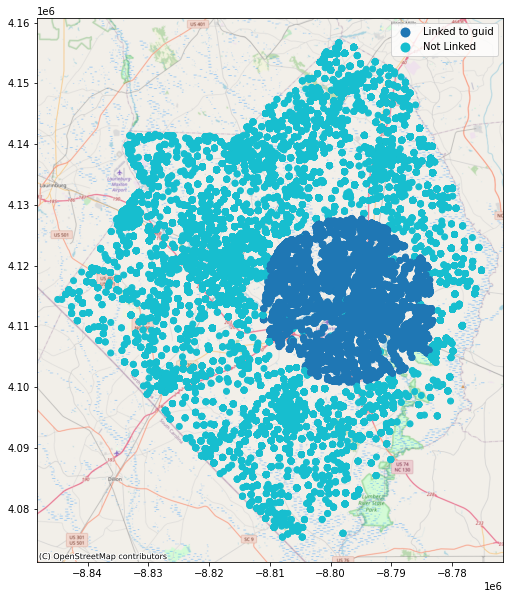

In [39]:
# visualize population
map = viz.plot_gdf_map(hua_gdf,column='Building Data')
map

Population linked to building data by tenure


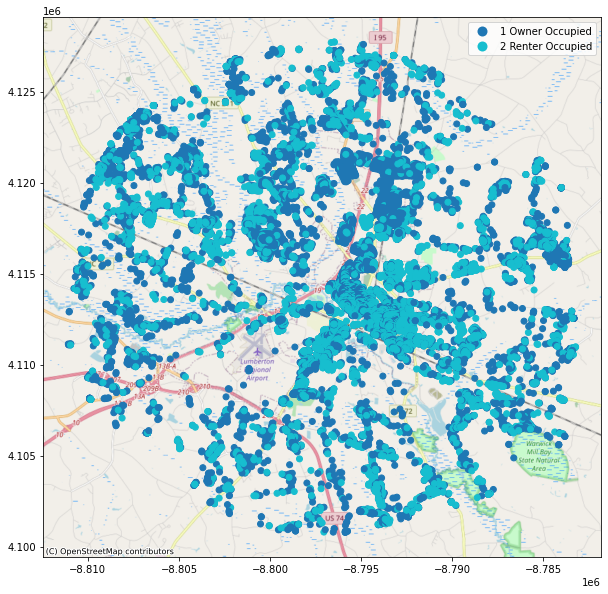

In [40]:
# visualize population
linked_gdf = hua_gdf.loc[hua_gdf['Building Data']=='Linked to guid'].copy()
map = viz.plot_gdf_map(linked_gdf,column='Tenure Status')
print('Population linked to building data by tenure')
map

Population not linked to building data by tenure


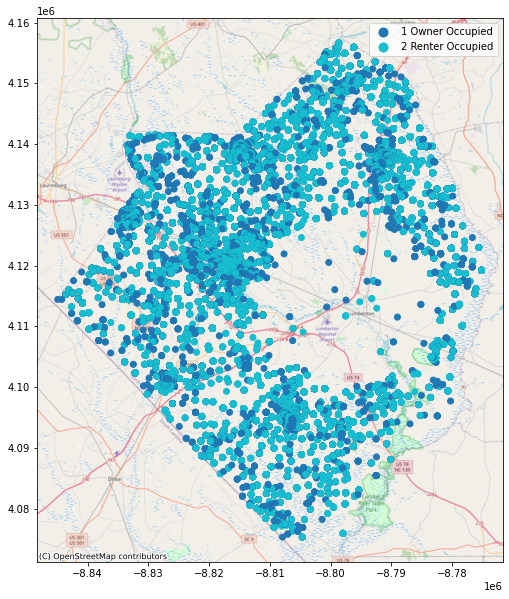

In [41]:
# visualize population
notLinked_gdf = hua_gdf.loc[hua_gdf['Building Data']=='Not Linked'].copy()
map = viz.plot_gdf_map(notLinked_gdf,column='Tenure Status')
print('Population not linked to building data by tenure')
map

In [42]:
#map = viz.plot_heatmap_from_gdf(linked_gdf,fld_name = 'numprec')
#map

Primary School Attendance Zones


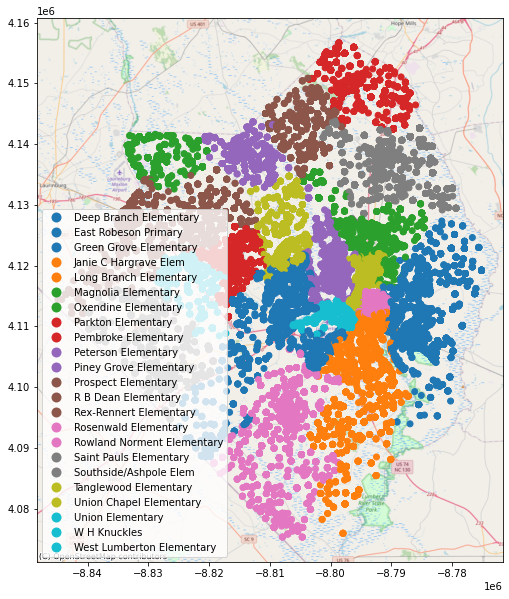

In [43]:
# visualize population
map = viz.plot_gdf_map(hua_gdf,column='primary_schnm')
print('Primary School Attendance Zones')
map

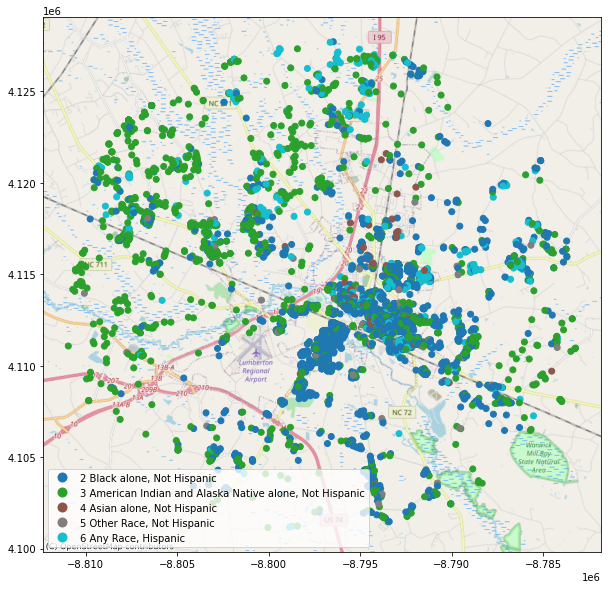

In [44]:
# visualize population by income and tenure status
minority_renters_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] != "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')].copy()
map = viz.plot_gdf_map(minority_renters_gdf,column='Race Ethnicity', category=True)
map

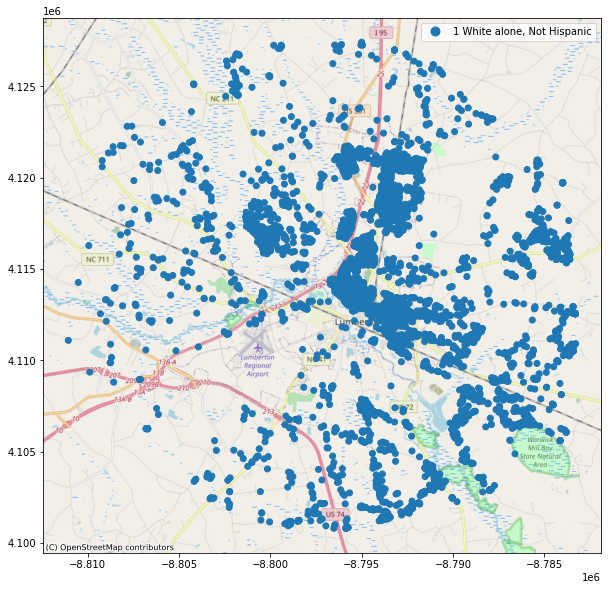

In [45]:
# visualize population by income and tenure status
nonminority_owners_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] == "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '1 Owner Occupied')].copy()
map = viz.plot_gdf_map(nonminority_owners_gdf,column='Race Ethnicity', category=True)
map

In [48]:
import folium as fm
from folium import plugins # Add minimap and search plugin functions to maps
from folium.map import *

#explore_map
gdf = minority_renters_gdf

# Check projection is epsg:4326

# Find the bounds of the Census Block File
minx = gdf.bounds.minx.min()
miny = gdf.bounds.miny.min()
maxx = gdf.bounds.maxx.max()
maxy = gdf.bounds.maxy.max()

map = fm.Map(location=[(miny+maxy)/2,(minx+maxx)/2], zoom_start=16)

minority_renters_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] != "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')].copy()
plugins.HeatMap(data = minority_renters_gdf[['y','x','numprec']].values.tolist(),
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 1.0: 'red'},
    name = 'Non-white Renters').add_to(map)

minority_owners_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] != "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '1 Owner Occupied')].copy()
plugins.HeatMap(data = minority_owners_gdf[['y','x','numprec']].values.tolist(),
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 1.0: 'red'},
    name = 'Non-white Home Owners').add_to(map)

nonminority_owners_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] == "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '1 Owner Occupied')].copy()
plugins.HeatMap(data = nonminority_owners_gdf[['y','x','numprec']].values.tolist(),
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'green', 1.0: 'blue'},
    name = 'White Home Owners').add_to(map)

nonminority_renters_gdf = hua_gdf.loc[(hua_gdf['Race Ethnicity'] == "1 White alone, Not Hispanic") &
                                   (hua_gdf['Building Data'] == "Linked to guid") &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')].copy()
plugins.HeatMap(data = nonminority_renters_gdf[['y','x','numprec']].values.tolist(),
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'green', 1.0: 'blue'},
    name = 'White Renters').add_to(map)

# Add minimap
plugins.MiniMap().add_to(map)

# Add Layer Control
fm.LayerControl(collapsed=False, autoZIndex=False).add_to(map)

# How should the map be bound - look for the southwest and northeast corners of the data
sw_corner = [gdf.bounds.miny.min(),gdf.bounds.minx.min()]
ne_corner = [gdf.bounds.maxy.max(),gdf.bounds.maxx.max()]
map.fit_bounds([sw_corner, ne_corner])

map.save('IN_CORE_CommunityDescription_Lumberton_2021-08-19.html')
map

In [49]:
# Save Work at this point as CSV
programname = 'IN_CORE_CommunityDescription_Lumberton_2021-08-19'
savefile = sys.path[0]+"/"+programname+".csv"
hua_gdf.to_csv(savefile, index = False)